In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import beta
import scipy
from sklearn import preprocessing
from datetime import datetime
import datetime
from datetime import date, time, datetime

In [46]:
sr = pd.read_csv("/Users/Jeanne/Documents/personal/Auction Results/soldresults.csv")
d = pd.read_csv("/Users/Jeanne/Documents/personal/Auction Results/hrnmalesumm.csv")

In [47]:
sr.shape

(2568, 28)

In [48]:
df = pd.merge(sr, d, left_on='Sire', right_on='horse')
df.shape

(1552, 36)

In [49]:
df.columns

Index(['Unnamed: 0_x', 'Name', 'Color', 'Sex', 'Foal Date', 'Sire', 'Dam',
       'Consignor', 'State', 'Barn', 'work time', 'set', 'day', 'Buyer ',
       'price', 'PS', 'Status', 'Out Date', 'AlphSort', 'OBSDate',
       'Sort By Dam', 'Area ID', 'In Foal Sire', 'Last Bred', 'Status ',
       'out date', 'hip', 'DS', 'Unnamed: 0_y', 'horse', 'pr', 'btz', 'wtz',
       'atz', 'npl', 'ap'],
      dtype='object')

In [50]:
df['Foal Date'] = pd.to_datetime(df['Foal Date'])
df['Foal Date']

0      2018-04-14
1      2018-02-14
2      2018-04-07
3      2018-05-08
4      2018-02-18
          ...    
1547   2020-04-27
1548   2007-04-01
1549   2013-04-16
1550   2013-03-18
1551   2008-02-10
Name: Foal Date, Length: 1552, dtype: datetime64[ns]

In [108]:
df = df[df['Sex'] == 'C']
df['Foal Date'] = pd.to_datetime(df['Foal Date'])
dff = df[df['Foal Date'].dt.year == 2020]
dff.shape

(100, 36)

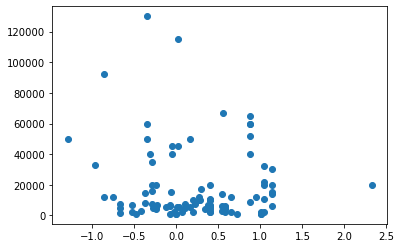

In [109]:
y = dff['price']
x = dff['atz']

plt.scatter(x, y)

<ipython-input-90-9e7375e59acb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfwt['wtbool'] = worktime


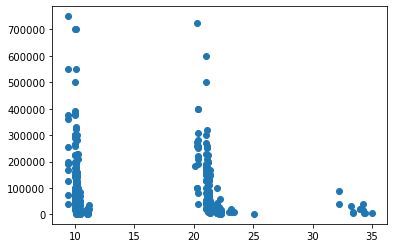

In [90]:
dfwt = df[pd.notnull(df['work time'])]

def is_float(x):
    try:
        float(x)
    except ValueError:
        return False
    return True

worktime = list()
for wt in dfwt['work time']:
    q = is_float(wt)
    worktime.append(q)

dfwt['wtbool'] = worktime
dfw = dfwt[dfwt['wtbool']== True]
y = dfw['price']
x = dfw['work time']

x = x.astype('float')
plt.scatter(x, y)

In [54]:
np.corrcoef(x, y)

array([[ 1.        , -0.10339594],
       [-0.10339594,  1.        ]])

In [91]:
df1 = df[df['horse']=='Practical Joke']

In [92]:
df1.iloc[:,1:20]

,Name,Color,Sex,Foal Date,Sire,Dam,Consignor,State,Barn,work time,set,day,Buyer,price,PS,Status,Out Date,AlphSort,OBSDate
431,NaN,CH,C,2019-04-07,Practical Joke,Lu Lu Laura,Summerfield (Francis & Barbara Vanlangendonck)...,FL,9.0,NaN,NaN,NaN,"Lothenbach Stables, Inc.",70000.0,NaN,NaN,NaN,Summerfield,2020-10-01
432,NaN,B,C,2019-04-28,Practical Joke,Polyester,"Stuart Morris, Agent XI",FL,13.0,NaN,NaN,NaN,Karl & Cathi Glassman,140000.0,NaN,NaN,NaN,Morris Stuart,2020-10-01
433,NaN,CH,C,2019-02-08,Practical Joke,Broken Marriage,"Stuart Morris, Agent II",KY,13.0,NaN,NaN,NaN,RiceHorse Stable,20000.0,PS,NaN,NaN,Morris Stuart,2020-10-01
435,NaN,B,C,2019-04-13,Practical Joke,Mystic City,"Eddie Woods, Agent VIII",NaN,11.0,21.1,44.0,3/11,"Sandin Syndicate Stable, W.E. Morey Agent",210000.0,NaN,NaN,NaN,Woods Eddie,2021-03-01
436,NaN,B,C,2019-03-31,Practical Joke,Untraveled,"McKathan Bros. Sales, Agent II",NaN,6.0,9.4,20.0,3/12,Hideyuki Mori,190000.0,NaN,NaN,NaN,McKathan Bros.,2021-03-01
439,NaN,DB/BR,C,2020-04-03,Practical Joke,Gaylo,"Pelican State Thoroughbreds, Agent I",NaN,10.0,NaN,NaN,NaN,August West,60000.0,NaN,NaN,NaN,PelicanStateThoroughbreds,2021-01-01
440,NaN,GR/RO,C,2020-03-20,Practical Joke,Holy Legacy,"Kaizen Sales (Richard Kent), Agent II",NaN,7.0,NaN,NaN,NaN,"Tom McCrocklin, Agent for Robert Cotran",50000.0,NaN,NaN,NaN,KaizenSales,2021-01-01
441,NaN,B,C,2020-03-04,Practical Joke,Mobeautiful,Summerfield (Francis & Barbara Vanlangendonck)...,NaN,9.0,NaN,NaN,NaN,Shepherd Equine Advisor Agt for Larry Hirsch,130000.0,NaN,NaN,NaN,Summerfield,2021-01-01


In [93]:
df1.iloc[:,20:40]

,Sort By Dam,Area ID,In Foal Sire,Last Bred,Status,out date,hip,DS,Unnamed: 0_y,horse,pr,btz,wtz,atz,npl,ap
431,NaN,NaN,NaN,NaN,NaN,NaN,140.0,Circular Quay,83,Practical Joke,1 mile,-0.410726,-0.313201,-0.352675,9,2.285714
432,NaN,NaN,NaN,NaN,NaN,NaN,173.0,Tiz Wonderful,83,Practical Joke,1 mile,-0.410726,-0.313201,-0.352675,9,2.285714
433,NaN,NaN,NaN,NaN,NaN,NaN,636.0,Broken Vow,83,Practical Joke,1 mile,-0.410726,-0.313201,-0.352675,9,2.285714
435,MysticCity,KY,NaN,NaN,NaN,NaN,113.0,City Zip,83,Practical Joke,1 mile,-0.410726,-0.313201,-0.352675,9,2.285714
436,Untraveled,KY,NaN,NaN,NaN,NaN,309.0,Canadian Frontier,83,Practical Joke,1 mile,-0.410726,-0.313201,-0.352675,9,2.285714
439,Gaylo,LA,NaN,NaN,NaN,NaN,119.0,Gayego,83,Practical Joke,1 mile,-0.410726,-0.313201,-0.352675,9,2.285714
440,HolyLegacy,FL,NaN,NaN,NaN,NaN,132.0,Unbridled's Song,83,Practical Joke,1 mile,-0.410726,-0.313201,-0.352675,9,2.285714
441,Mobeautiful,KY,NaN,NaN,NaN,NaN,182.0,Uncle Mo,83,Practical Joke,1 mile,-0.410726,-0.313201,-0.352675,9,2.285714


In [ ]:
df['Foal Date'] = pd.to_datetime(df['Foal Date'])
df['Foal Date']